# Project #3 Task 4: ANN Modelling and Model Performance Evaluation

   You are going to do Project #3 Task 4: ANN modeling.First, practice with synthetic dataset, and then use your project dataset

    
   Classwork: Practice with Synthetic data-based modeling to learn step by step how the ANN modeling and evaluation works
       
       a) Use balisticwithout wind data. The Projectile motion time of flight and range data has been generated by random 
       Inital velocity and intial angle. Therfore, using Input features (V0 and ang), and Target (Time, or R) peform ANN 
        modelling and Check if ANN perfectly discovred the physics (i.e, using 70% data for training, check if the model 
        predict the test 30% perfectly). In short, run two modeling 
            I ) Input features (V0 and ang), and Target (Time) 
           II ) Input features (V0 and ang), and Target (R) 
   
   
   Your Project #3 Task #4 is to be handed in.
       
          
       b) Using your CleanedFeatureSelected.xlsx file from Task #1, your task is to model Vp as a target, and the rest logs as input feature
           
           Input features a combination of (DEN, NEU, Vs), and Target (Vp) 
           
           Which combination of input features provided a good model for the target (Vp)? 
           Which combination of optimizers and activation functions gives good results?
           (Here, you will design different experiments and present your final result based on R2 comparison plotting in bar graph)
   
                  
 
 How the ANN modeling and Performance analysis work? 
       
       We will learn during lecture hr. The note is uploaded as lecture #4
       
       When you do your project works, feel free to contact me at my office or in the lab
       

In [1]:
###==========================================================================================================================###
#Please take time to read the following guide written in this box. 
#Here, you will get the brief information about the modelling
#The ANN modelling will be performed with Keras/Python built-in library
#if incase you dont have the tensor flow, you need to install by the following options

# Installing required libraries
#!pip install TensorFlow
#!pip install keras

###==========================================================================================================================###
# Here we will perform ANN after standardizing the dataset
   # It is reported that Standardization of the dataset improves the performance of a Multilayer Perceptron model on regression predictive modeling problems.
###==========================================================================================================================###
    
# Read this and the ANN modeling code is summarized as the following 

# Step 1 Data Loading/Importing
    # Import the pre-processed dataset from Task#1 
    # Target and predictor variables separation 
    # Standardization via python StandardScaler() function. 
    # Splitting data into training and test set 
    
# Step 2 ANN modeling  
 #2-1 CREATING ANN MODEL 
  #2.1.1 Defining the Input layer and FIRST hidden layer!
  #2-1.2 Defining the Second layer of the model
  #2-1.3 The output neuron is a single fully connected node 
# 2-2 COMPILING THE MODEL 
# 2-3 FITTING THE ANN to the Training set

# Step 3 Model prediction
   #Perform inverse transformation
   # Pediction and compare with measured data

# Step 4 Model performance analysis 
  # Here use R2 and MSE to evaluate the model accuracy of the prediction
###==========================================================================================================================###



# Install Tensorflow and keras

In [2]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [3]:
# Here Collect all the libraries used for this Task
# There are placed in different places to show for the students the process

# Import data

In [4]:
# Reading the CleanedFeatureSelected.xlsx data obtained from Task #1
import pandas as pd
import numpy as np
#
CleanedData =pd.read_excel('balisticwithoutwind.xlsx') # This file is just for practice to be familiar with the computation process
#CleanedData =pd.read_excel('CleanOutlier1.xlsx')  # Here, use your ClenaedFeatureSelected.xlsx file for the Task #4

CleanedData.head()


V0   ang  Time       R
0  67.65  36.0  6.20  190.30
1  80.49  31.1  6.19  220.69
2  70.54  54.9  8.46  175.34
3  84.60  52.9  9.16  209.60
4  64.27  30.7  5.31  176.03

# Abstract

# Introduction

# ANN Modeling

# Standardize and Split (Training/Test)

In [5]:
# Separate Target Variable and Predictor Variables

# Task 1: Practice with Synthetic Data (Projectile without wind, target are either time, or range (R), Features are V0 and and)
TargetVariable=['Time']
#TargetVariable=['R']
Predictors=['V0', 'ang']
#Predictors=['V0', 'ang','Time']

#Task 2: Your project Later you will use your project cleaned here (Any combination of input features)
#TargetVariable=['Vp']
#Predictors=['Vs', 'DEN', 'NEU']

X=CleanedData[Predictors].values
y=CleanedData[TargetVariable].values


# Let us do standardization and data splitting......
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#CleanedData[TargetVariable].values
#CleanedData[TargetVariable].values

(210, 2)
(210, 1)
(90, 2)
(90, 1)


# ANN Modeling Step by Step

In [6]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense


# ============Create ANN model========================
model = Sequential()


# Defining the Input and FIRST hidden layers are the same! Dense allows nodes to be fully connected
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))


# Defining the Second layer of the model
# After the first layer we don't have to specify input_dim as Keras configure it automatically

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#======================# The output neuron is a single fully connected node =======================
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))



# ==================Compiling the model======================================
model.compile(loss='mean_squared_error', optimizer='adam')

# =================Fitting the ANN to the Training set======================

model.fit(X_train, y_train ,batch_size = 32, epochs = 500, verbose=0) # vebrose =1, allows to visualise the iteration. =0, not
 

#==================For Logging modeling loss history ========================

history = model.fit(X_train, y_train ,batch_size = 32, epochs = 500, verbose=1)


Epoch 1/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 6/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 8/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 9/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 10/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 11/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 12/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 13/500
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 105/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 106/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 107/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 108/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 109/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 110/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 111/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 112/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 113/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 114/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 115/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 116/500
7/7 [==============================] 

7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 207/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 208/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 209/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 210/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 211/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 212/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 213/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 214/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 215/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 216/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 217/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 218/500
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 309/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 310/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 311/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 312/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 313/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 314/500
7/7 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 315/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 316/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 317/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 318/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 319/500
7/7 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 320/500
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 411/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 412/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 413/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 414/500
7/7 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 415/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 416/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 417/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 418/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 419/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 420/500
7/7 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 421/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 422/500
7/7 [==============================] - 0

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(model)

## Model prediction

In [9]:

#=============================================================
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

####y_test_orig=y_test

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

#####Test_Data=X_test
#=============================================================

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Range']=y_test_orig
TestingData['Predicted Range']=Predictions
TestingData.head(20)


3/3 [==============================] - 0s 7ms/step


V0   ang  Range  Predicted Range
0   63.94  64.4   8.71         8.706497
1   61.60  40.7   6.38         6.440464
2   73.12  35.4   6.43         6.364453
3   71.05  56.0   8.60         8.538653
4   67.36  36.1   6.20         6.153336
5   66.51  62.5   8.79         8.739368
6   90.73  38.0   7.65         7.615477
7   98.97  49.1   9.48         9.463510
8   83.31  66.2  10.26        10.281276
9   77.43  47.7   8.18         8.160733
10  90.49  38.5   7.71         7.666831
11  63.50  30.1   5.19         5.189573
12  77.80  45.6   7.96         7.911752
13  64.50  42.8   6.81         6.860067
14  72.91  39.7   6.96         6.902844
15  84.66  67.0  10.41        10.446560
16  75.70  63.5   9.54         9.498532
17  86.19  67.1  10.51        10.567476
18  92.46  41.8   8.25         8.191216
19  89.04  35.1   7.16         7.156805

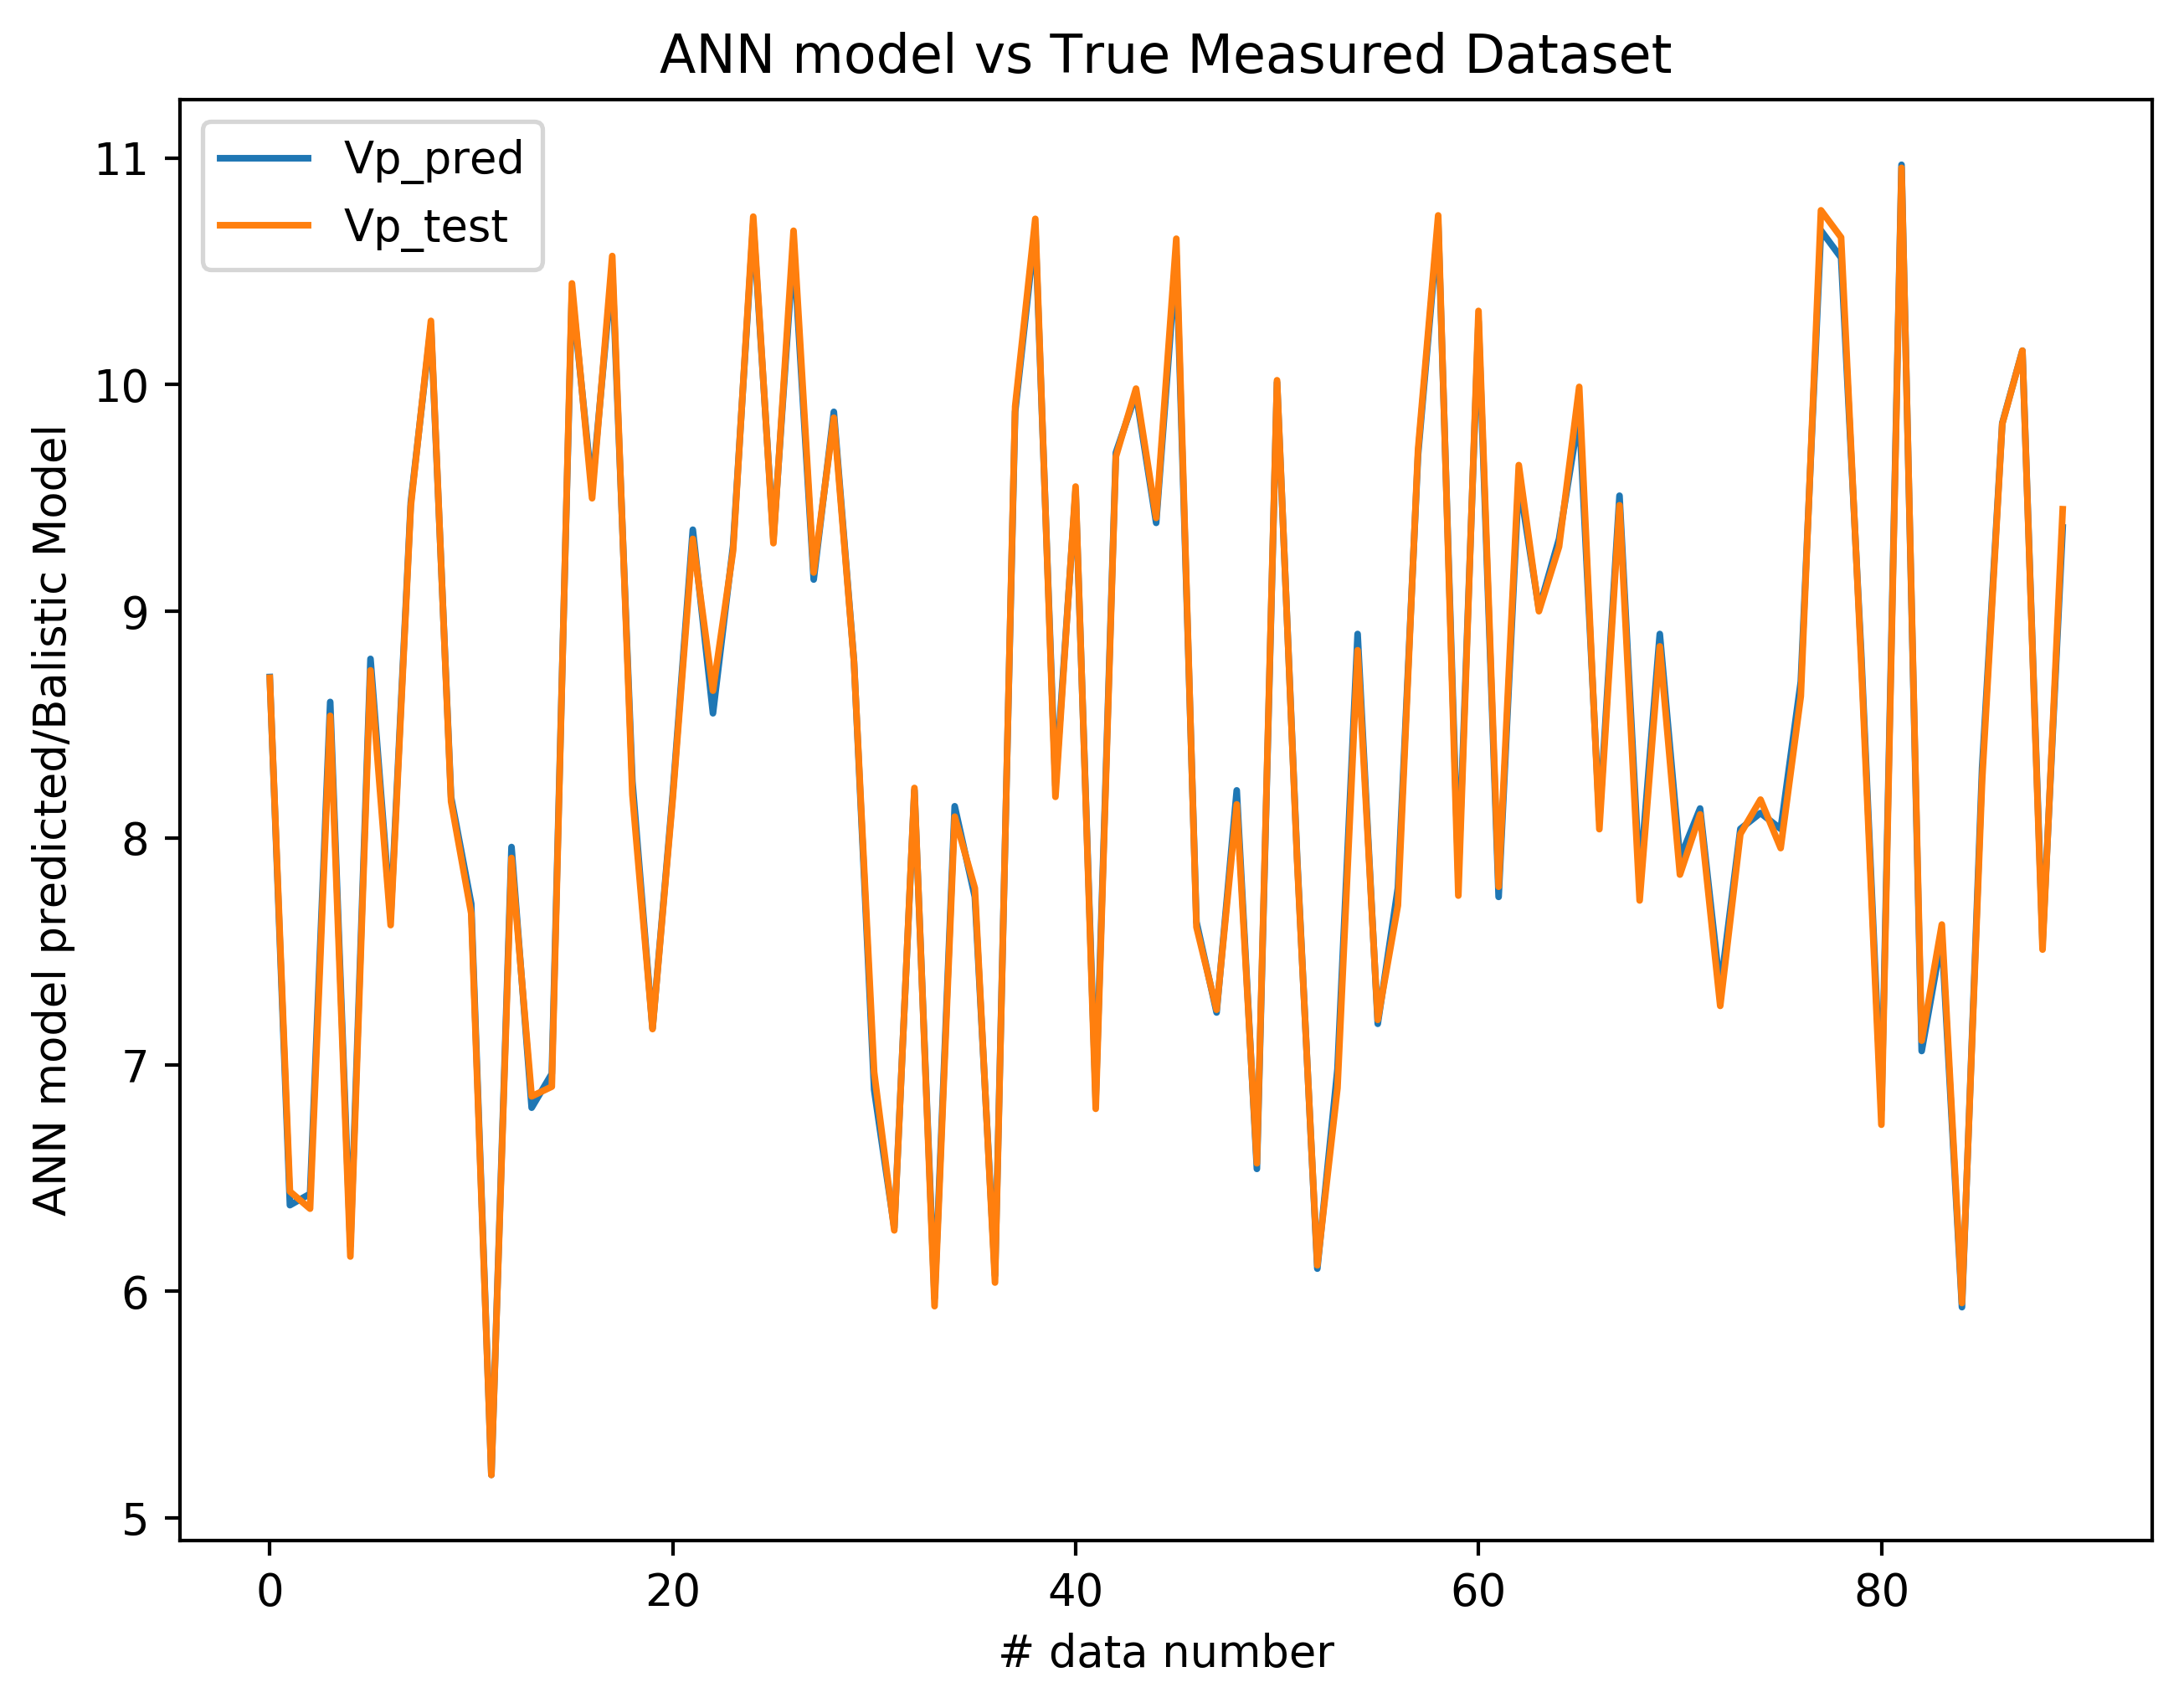

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig)
plt.plot(Predictions)


plt.title('ANN model vs True Measured Dataset')
plt.ylabel('ANN model predicted/Balistic Model')
plt.xlabel('# data number')
plt.legend(['Vp_pred', 'Vp_test'], loc='upper left')
plt.show()



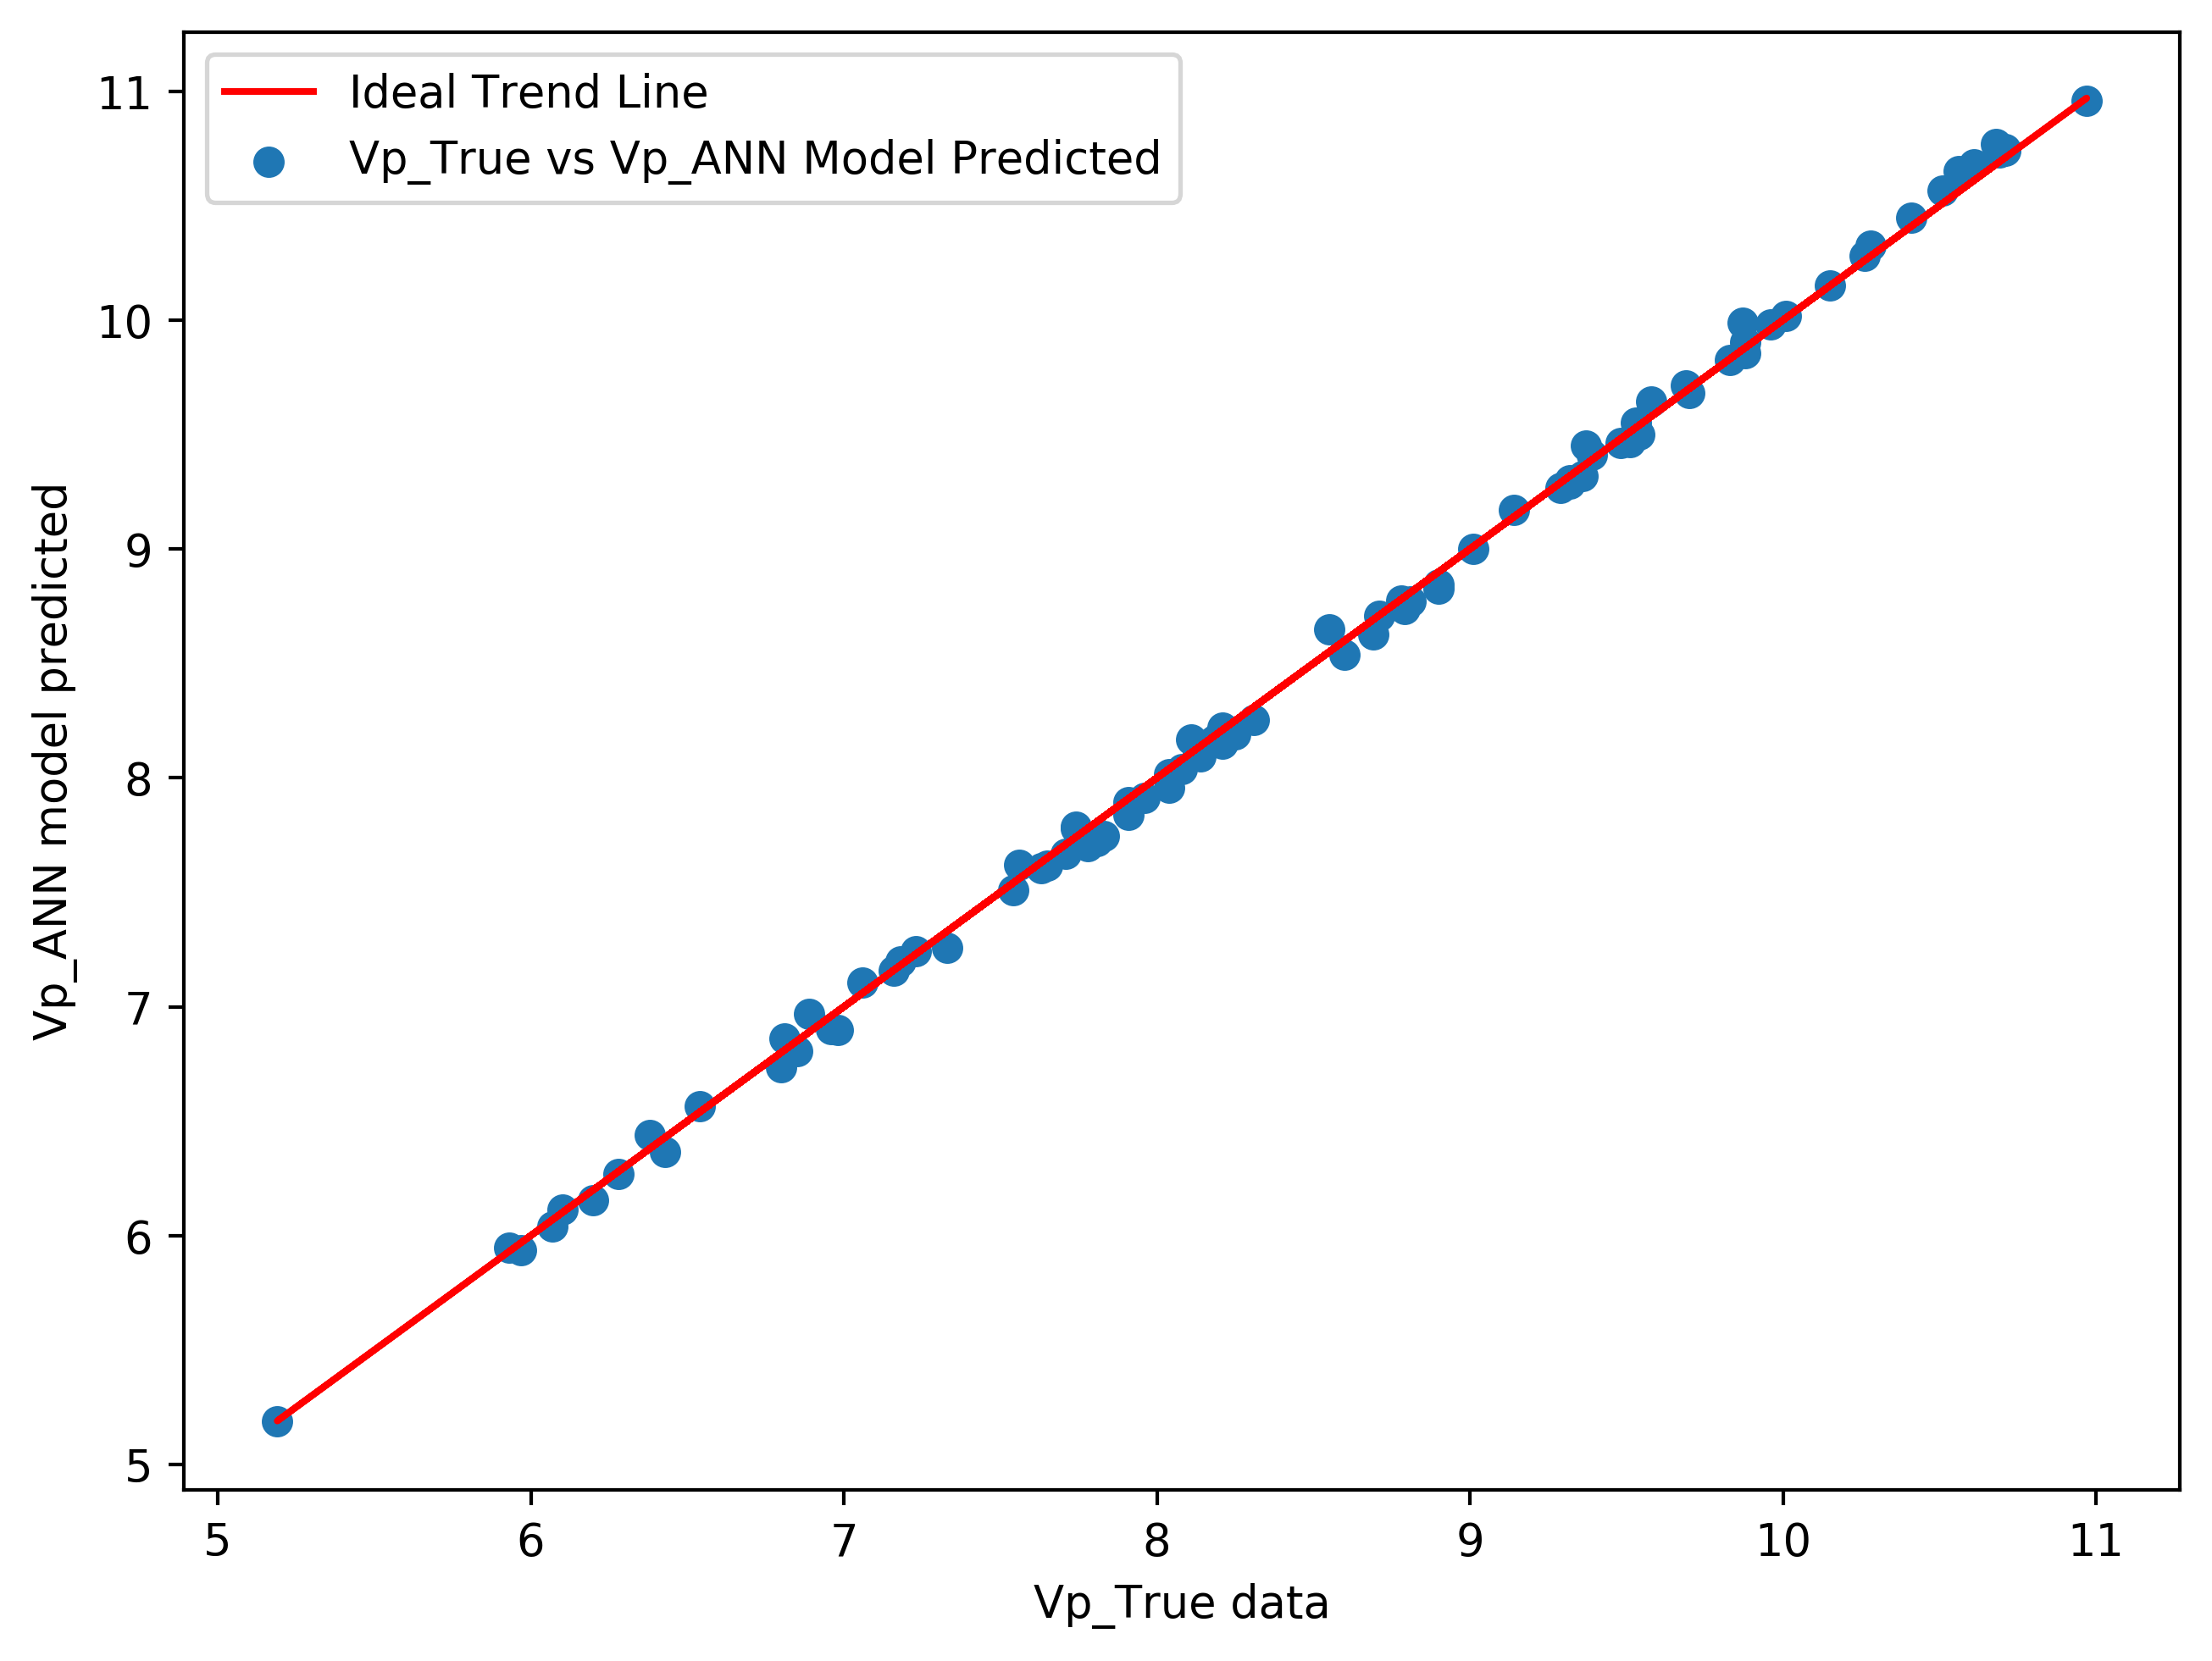

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=380)

plt.plot(y_test_orig,y_test_orig, 'r')
plt.scatter(y_test_orig, Predictions)

plt.ylabel('Vp_ANN model predicted')
plt.xlabel('Vp_True data')
plt.legend(['Ideal Trend Line','Vp_True vs Vp_ANN Model Predicted'], loc='upper left')

#plt.ylim(2.7, 4.75)
#plt.xlim(2.7, 4.75)

# Model accuracy analysis

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Transformed dataset
mse_no= mean_squared_error(y_test,model.predict(X_test))
r2_no= r2_score(y_test,model.predict(X_test))

# Original dataset after inversion back
#mse_no= mean_squared_error(y_test_orig,Predictions)
#r2_no= r2_score(y_test_orig,Predictions)

3/3 [==============================] - 0s 4ms/step


In [13]:
print('Mean Square Error       :',mse_no)
print('R2 Score                :',r2_no)


Mean Square Error       : 0.0012692227447361137
R2 Score                : 0.9987223465613136


In [14]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


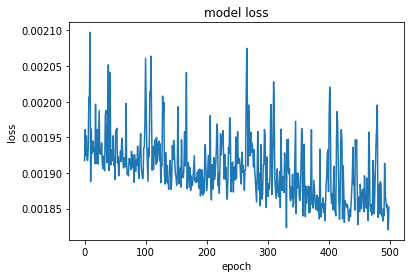

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['test'], loc='upper right')
#plt.ylim(0, 0.001)
#plt.xlim(0, 1000)
plt.show()

# Discussion

# Reflection

# References

# Conclusion

    Results show that ANN predict the test dataset with the accuracy of R_Squared: 0.999934923476118

    


# Your task #4

    As mentioned, it is now time to Change the file from ballistic to your CleanedFeatureSelected.xlsx file
    
    Then, do the modeling works according to the report hand-in format

    Read the word documents to guide you what kind of experiments you could do...